### Introduction
Term deposit is always a key business of a bank and a good marketing campaign plays an important role in financial selling. Nowadays, the telephone marketing, which can assist consulting institution to extract potential clients, has been one of the most general marketing campaigns. The objective of this project is to predict the result of phone calls to long term deposits. The results will be valuable to assist managers in prioritizing and selecting the next customers to be contacted during the term deposit campaigns.

### Machine learning problem
The classification approach to predict which clients are more likely to subscribe for the term deposits.

### Dataset information
Dataset is collected from UCI Machine learning Repository.

Link: https://archive.ics.uci.edu/ml/datasets/bank+marketing#

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

The dataset provides the customers' information of the bank from May 2008 to November 2010. It includes 41,188 records and 21 fields.
#### Input variables:
**Bank client data**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-
collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign**
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) - Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy (Formula: ((number of employees in this quarter - number of employees in previous quarter)/average employees in the time period))

17 - cons.price.idx: consumer price index - monthly indicator (numeric) - A Consumer Price Index measures changes in the price level of a weighted average market basket of consumer goods and services purchased by households.The CPI for the current year is either more or less than 100, with the former indicating an increase in the prices of the goods and services and the latter signifying the decrease in the costs over a period.

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) - Consumer confidence index provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.

19 - euribor3m: euribor 3 month rate - daily indicator (numeric) - The 3 month Euribor interest rate is the interest rate at which a panel of banks lend money to one another with a maturity of 3 months.



20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Exploratory data analysis

#### Data Acquiring

In [123]:
# Import neccessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [124]:
pd.set_option("display.max_columns", 30)

In [125]:
# Data acquiring
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


This dataset has 41,188 records and 21 fields

In [126]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [127]:
data.shape

(41188, 21)

In [128]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Next, I will drop "duration" feature because this feature means the last contact duration (in seconds). This attribute highly affects the output target(e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [129]:
data.drop(['duration'], axis = 1, inplace = True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


#### Splitting of data

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### EDA

In [133]:
# Get some basic information about the dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 31880 to 2732
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  campaign        28831 non-null  int64  
 11  pdays           28831 non-null  int64  
 12  previous        28831 non-null  int64  
 13  poutcome        28831 non-null  object 
 14  emp_var_rate    28831 non-null  float64
 15  cons_price_idx  28831 non-null  float64
 16  cons_conf_idx   28831 non-null  float64
 17  euribor3m       28831 non-nu

In [134]:
# Which columns are categorical 
object_cols = [i for i in X_train.columns if X_train[i].dtype == 'O']
object_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [135]:
# Which columns are numerical
numerical_cols = [i for i in X_train.columns if X_train[i].dtype != 'O']
numerical_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [136]:
# Describe numerical columns
X_train.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.055322,2.570532,962.629600,0.173633,0.071139,93.572059,-40.518234,3.610646,5166.737016
std,10.422638,2.762330,186.532258,0.492356,1.574005,0.580447,4.632800,1.736874,72.283580
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- The average age of bank's customers is 40 years old. While the youngest customer is 17 years old, the oldest one is 98 years old.
- In average, each customer has 2.5 contacts with the bank during this campaign
- Most clients were not previously contacted 
- In the previous campaign, each customer has just 0.17 contacts in average.
- Mean of employment variation rate is 0.07, so the number of employees did not change much during the discussed time period
- Average price of consumer goods and services has decreased over the time period (mean of cons_price_idx is 93.57)


In [137]:
# Describe object columns
X_train.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,28831,28831,28831,28831,28831,28831,28831,28831,28831,28831
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,7262,17559,8460,22766,15125,23751,18340,9651,6107,24850


- In terms of job, the highest percentage of clients works as admin
- Regarding education, customers having university degree account for the highest proportion

In [138]:
# Get the number of missing values in each column
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

The train dataset does not have missing values

#### Show 1D charts

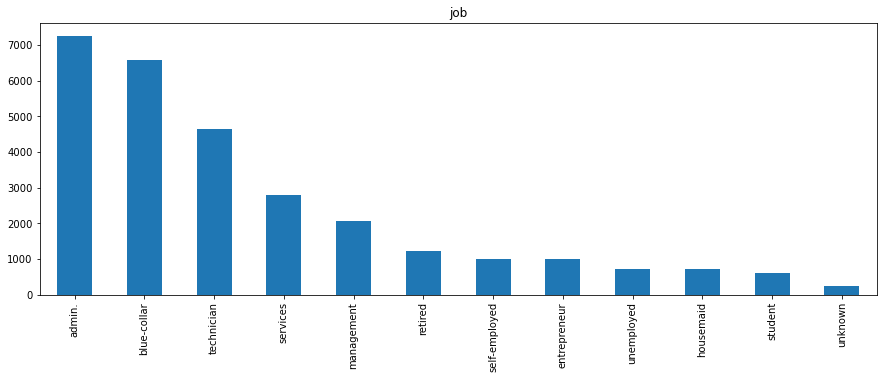

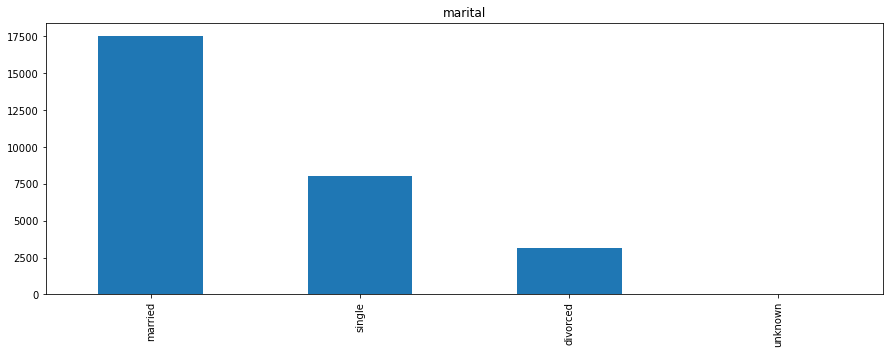

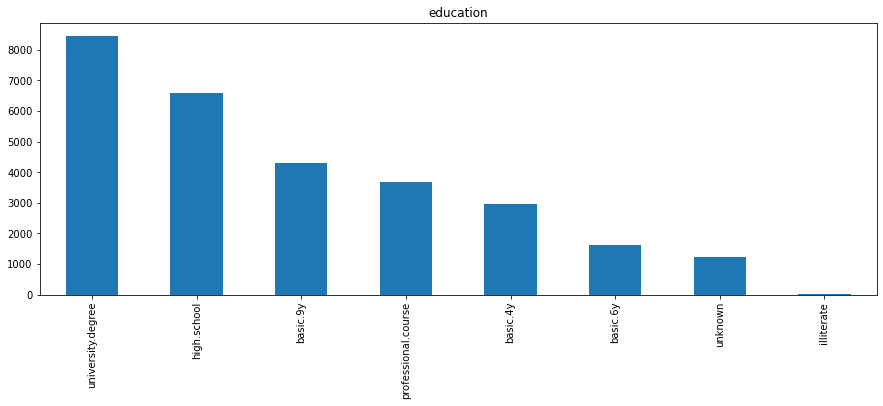

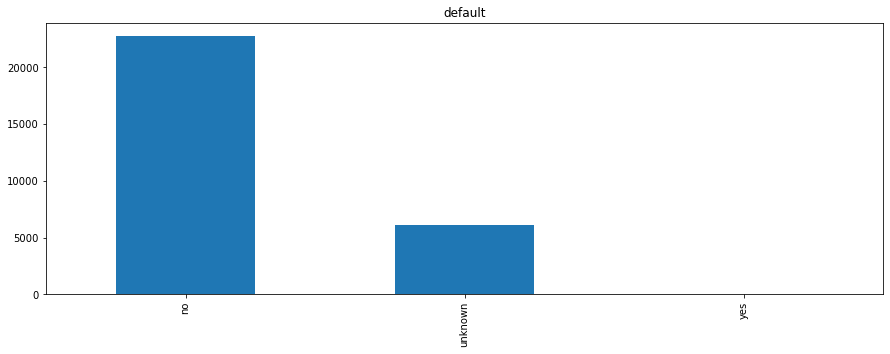

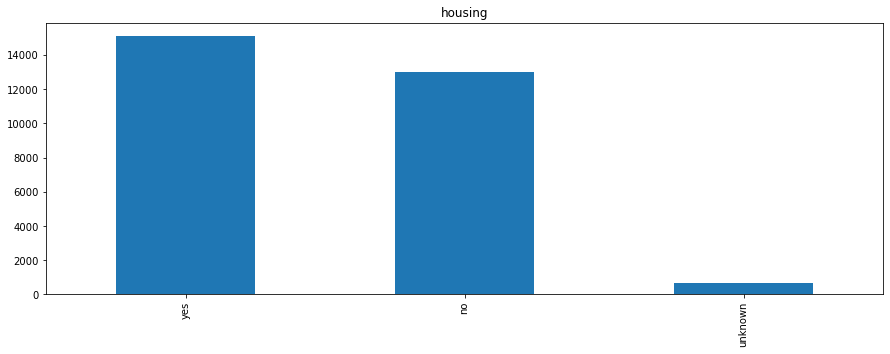

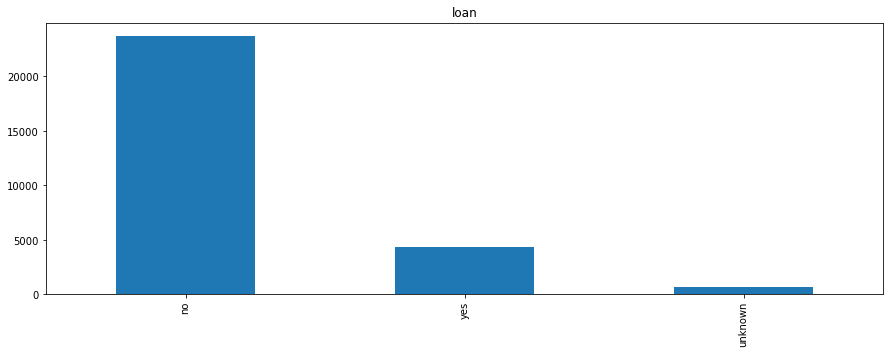

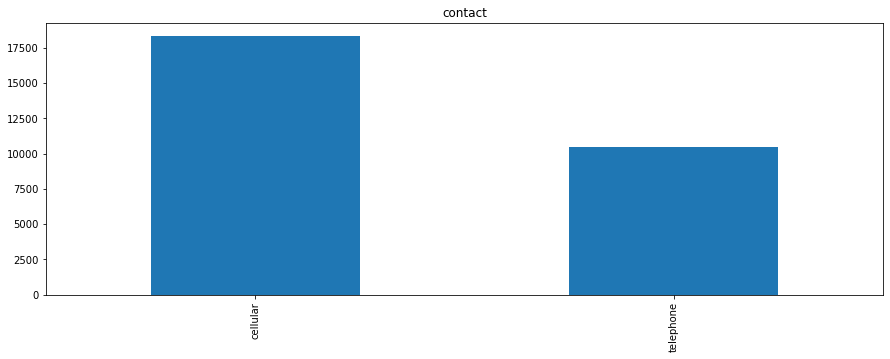

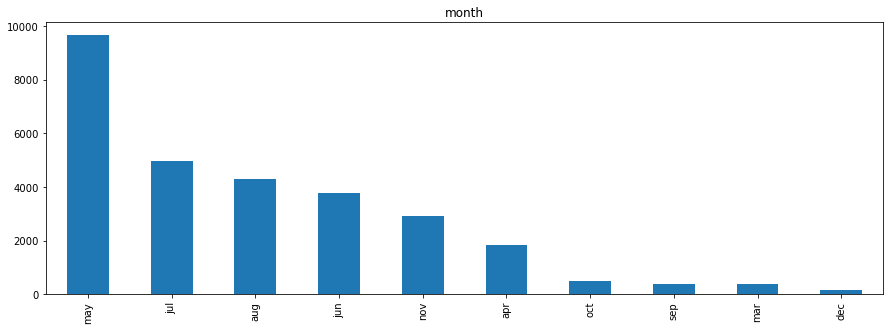

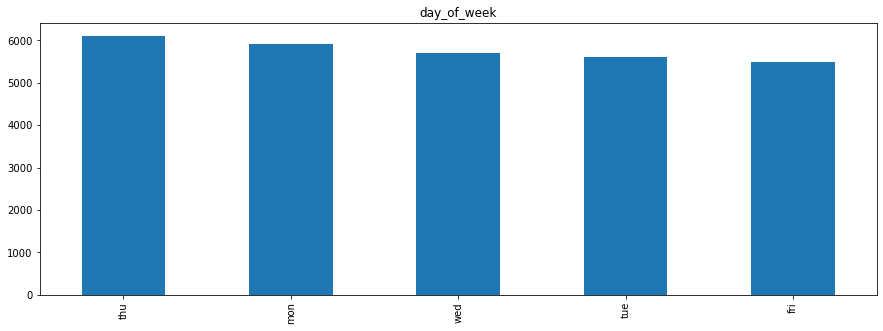

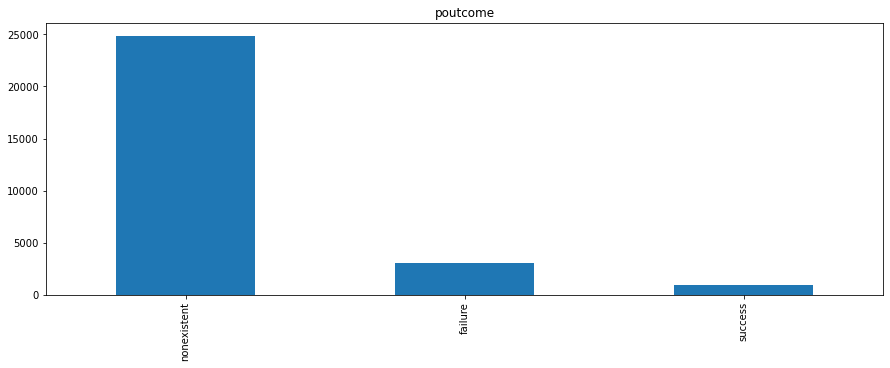

In [139]:
# Show the number of each value in each features by bar charts
for col in object_cols:
    X_train[col].value_counts().plot(kind='bar', figsize=(15,5))
    plt.title(col)
    plt.show()

**Input Categorical feature observations**
- Job:Most bank's customers have job types of Admin, blue-color and technician. It means bank targets high salaried people.
- Marital: High proportion of customers are married
- Education: more clients had university degree. Obviously, people having university degree have higher salaries
- Default: Most clients do not have credit default, it means they can be approached
- Housing: We must give more importance on clients who do not have housing loan
- Loan: We must give more importance on customers who do not have personal loan
- Month: May seems to be the busy month of the bank
- Day_of_week: everyday seems to be busy
- Contact: The number of customers which the bank had contacted through cellular were doubled those which the bank had contacted through telephone
- poutcome: the success rate of the previous campaign is small


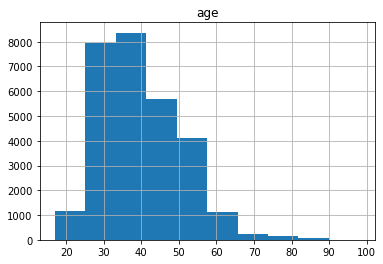

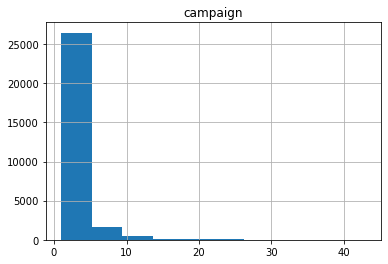

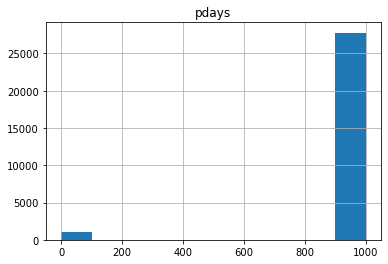

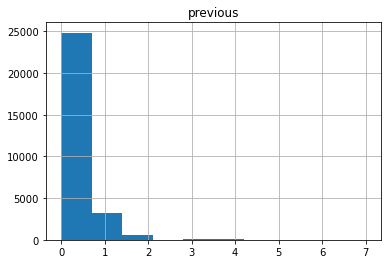

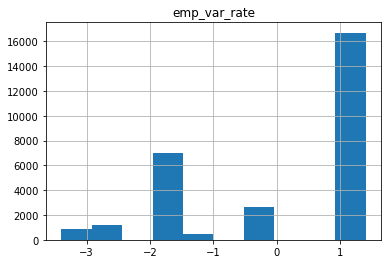

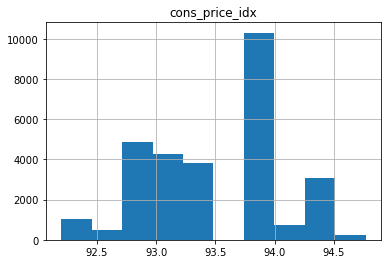

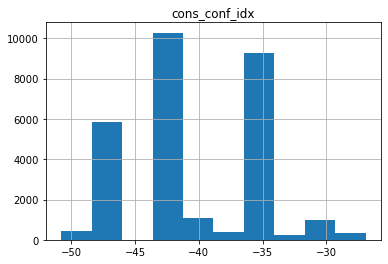

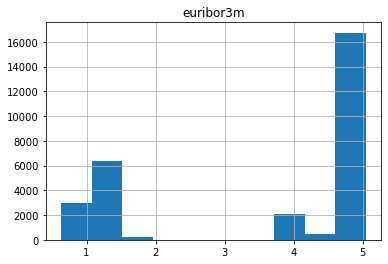

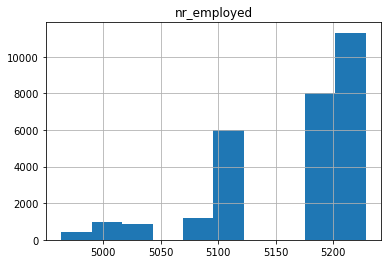

In [142]:
# Show histograms of numerical columns:
for col in numerical_cols:
    X_train[col].hist()
    plt.title(col)
    plt.show()

**Input numerical feature observations**
- Age: More clients are in 30-40 years old
- Campaign: Most clients were contacted around 1-5 times by the bank in this campaign
- pdays: From the previous campaign, most clients were not contacted
- previous: In the previous campaign, most customers were contacted less than 1 time
- emp_var_rate: More quarters saw the increase in employment compared to the previous quarters
- cons_price_idx: The price of consumer good and services decreased
- cons_conf_idx: Consumers had the negative opinions about future developments of households' consumption and saving
- euribor3m: Banks lend money to one another with a maturity of 3 months with the interest rate of nearly 5%

### 2D analysis

In [158]:
train_data = pd.concat([X_train, y_train], axis=1)

train_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
31880,31,technician,single,university.degree,no,no,no,cellular,nov,tue,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
38177,44,admin.,married,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2459,43,management,married,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
756,35,blue-collar,married,basic.4y,no,no,no,cellular,nov,tue,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
11275,33,admin.,single,university.degree,no,yes,yes,cellular,may,thu,2,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,57,blue-collar,married,basic.4y,no,yes,yes,telephone,may,tue,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
32103,36,blue-collar,single,basic.9y,no,no,yes,telephone,may,thu,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
30403,31,technician,married,professional.course,no,no,no,telephone,jun,wed,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,1
21243,29,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


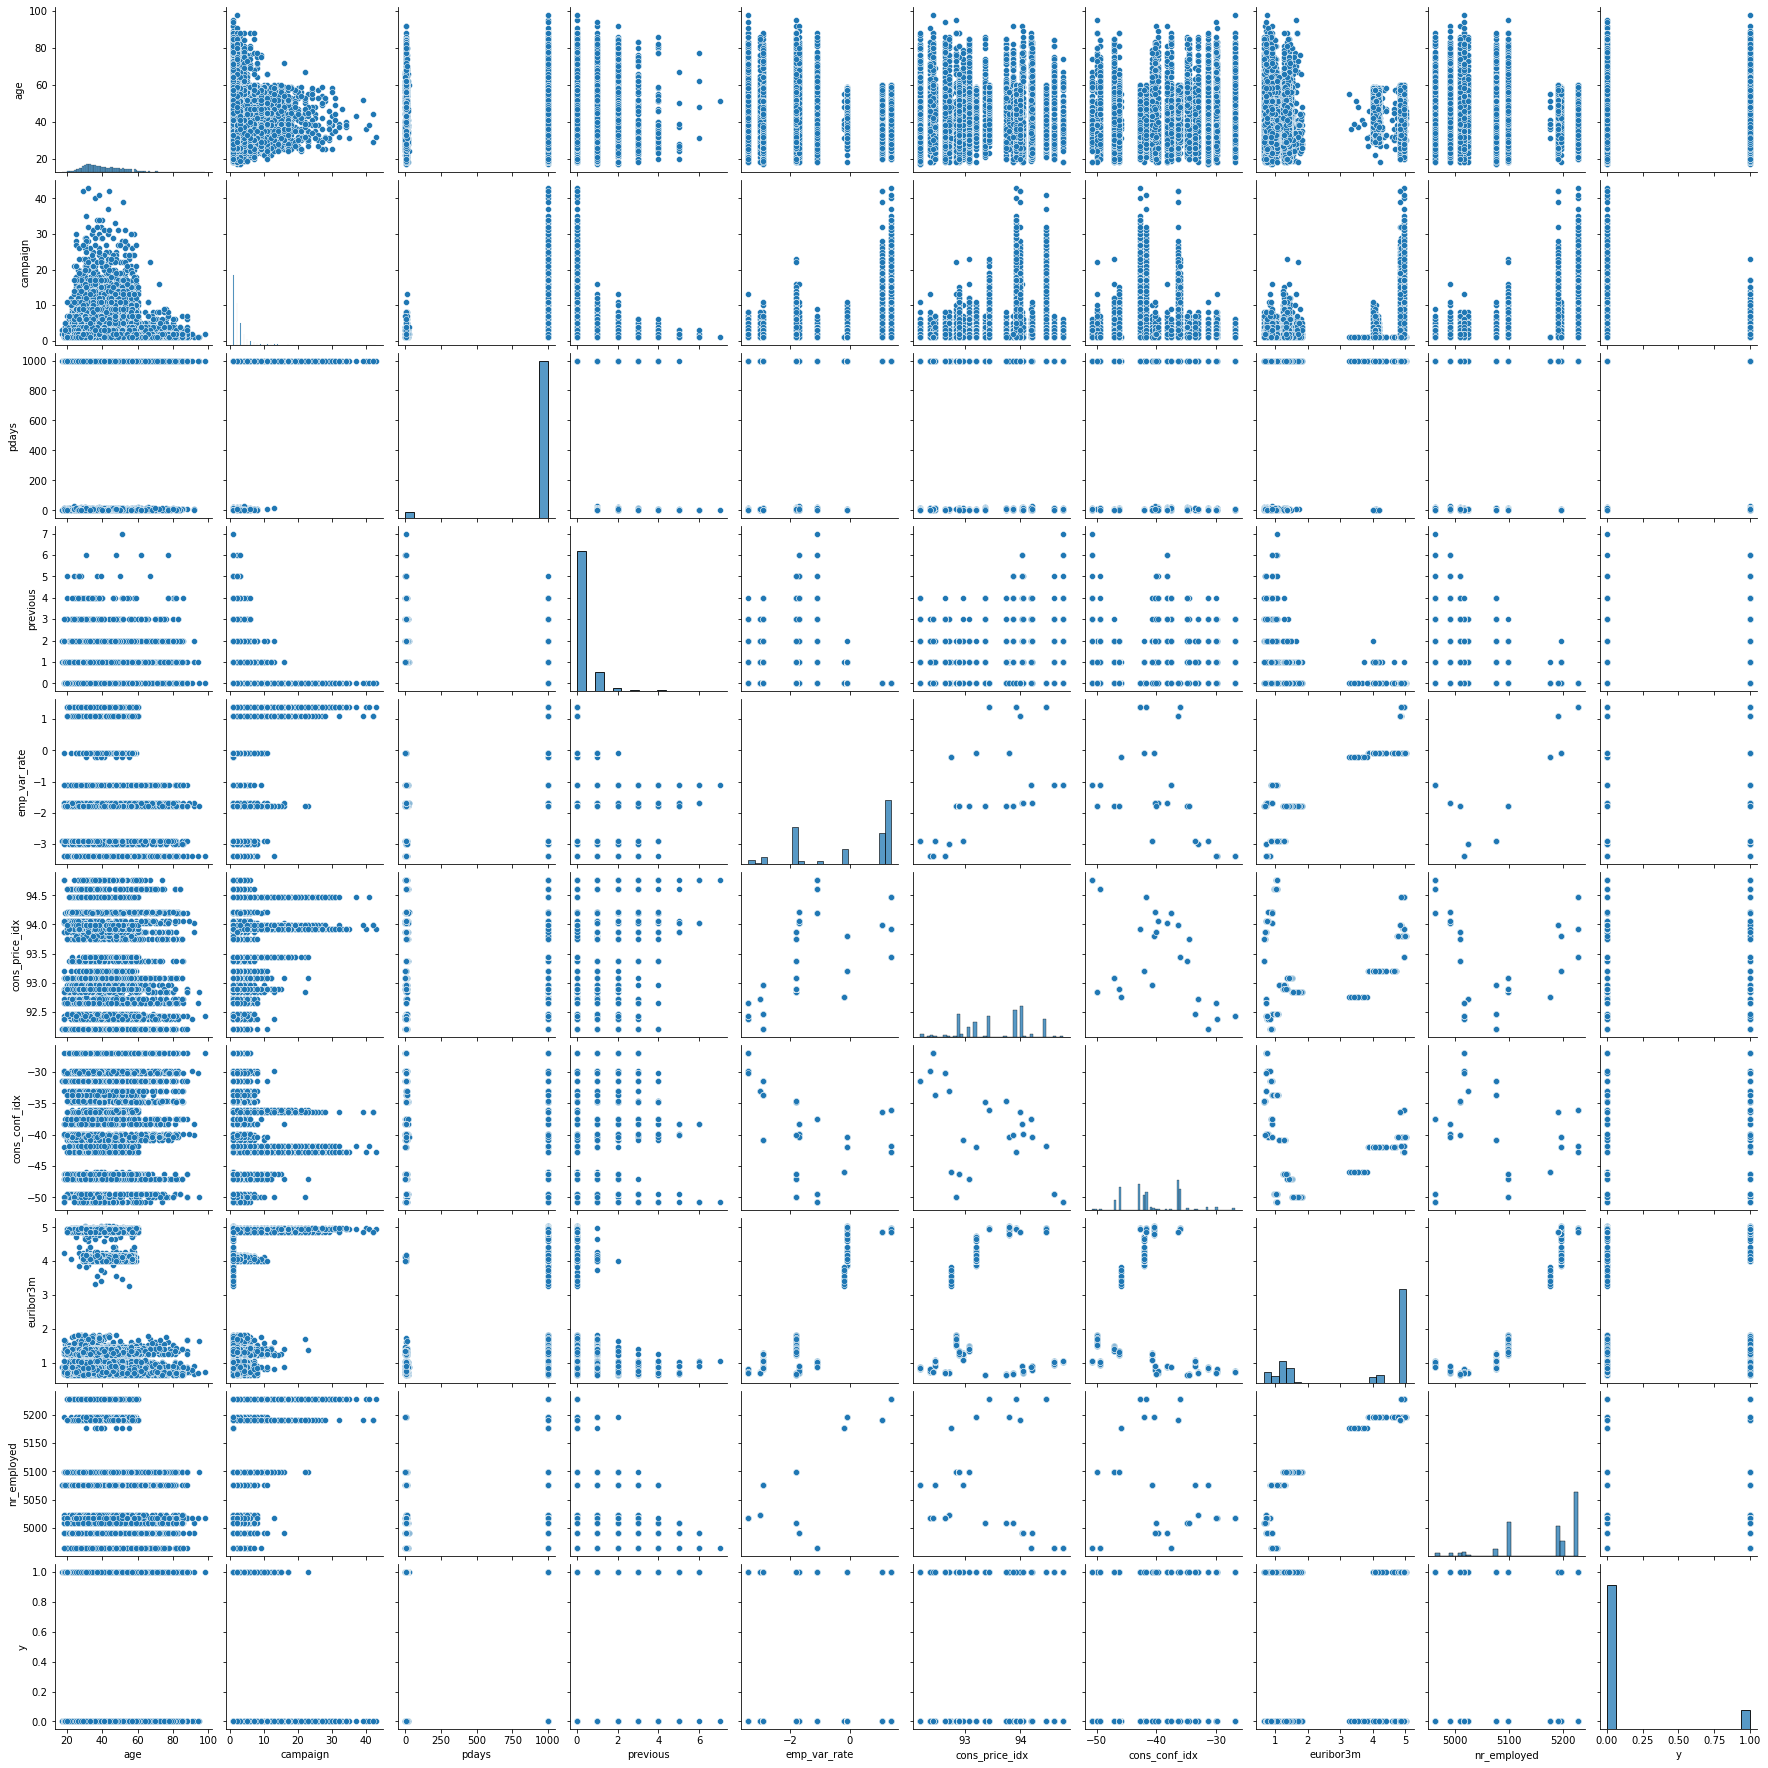

In [159]:
sns.pairplot(train_data)



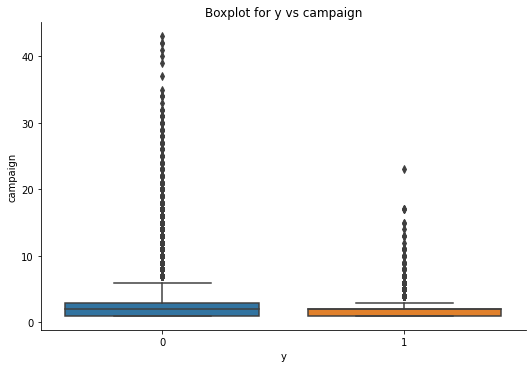

In [160]:
sns.catplot(x="y", y="campaign", data=train_data, kind="box", aspect=1.5)
plt.title("Boxplot for y vs campaign")
plt.show()

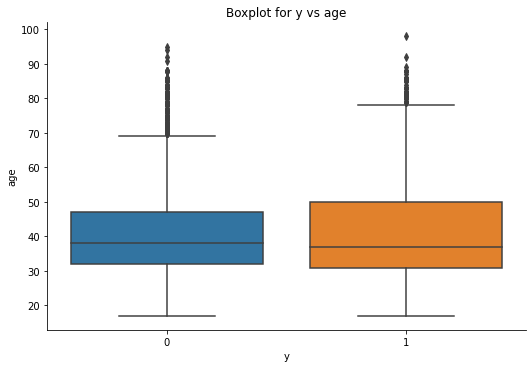

In [161]:
sns.catplot(x="y", y="age", data=train_data, kind="box", aspect=1.5)
plt.title("Boxplot for y vs age")
plt.show()

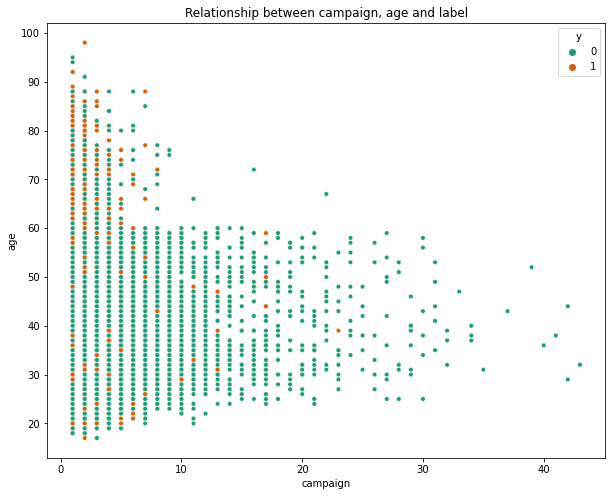

In [169]:
plt.figure(figsize=(10,8))

sns.scatterplot(x="campaign", y="age", hue="y", data=train_data, palette="Dark2", s=20)
plt.title("Relationship between campaign, age and label")
plt.show()

<ipython-input-179-70fffefa7b7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_data.corr(method = 'pearson')


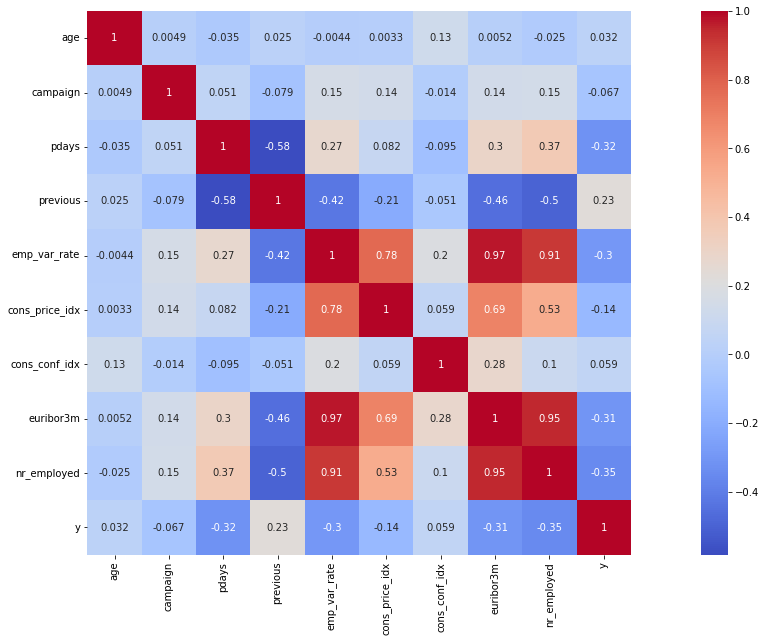

In [179]:
#### Show correlations between features
correlations = train_data.corr(method = 'pearson')
plt.figure(figsize = (25,10))
sns.heatmap(correlations, vmax = 1, square = True, annot= True, cmap='coolwarm')
plt.show()

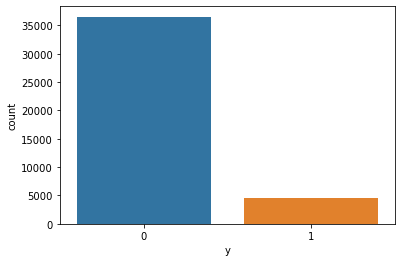

In [15]:
sns.countplot(x = 'y', data = data)
plt.show()


In [16]:
count_no_sub = len(data[data['y'] == 0])
count_sub = len(data[data['y'] == 1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print('percentage of no subscription is', pct_of_no_sub*100)
print('percentageof subscription is', pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentageof subscription is 11.265417111780131


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let's do some more exploration.

In [17]:
data.groupby('y').mean()

<ipython-input-17-1c0ce2b04705>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('y').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [18]:
data.groupby('job').mean()

<ipython-input-18-91ec6f027066>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('job').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [19]:
data.groupby('marital').mean()

<ipython-input-19-91bb8e81df13>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('marital').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [20]:
data.groupby('education').mean()

<ipython-input-20-4c375781e437>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('education').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [213]:
job_crosstab = pd.crosstab(train_data['job'], train_data['y'], margins = True, margins_name = "Total")
job_crosstab


y,0,1,Total
job,,,
admin.,6307,955,7262
blue-collar,6117,457,6574
entrepreneur,918,82,1000
housemaid,651,66,717
management,1829,238,2067
retired,897,314,1211
self-employed,901,105,1006
services,2547,237,2784
student,398,197,595


In [214]:
job_crosstab[0] = job_crosstab[0]/job_crosstab[0]['Total']
job_crosstab[1] = job_crosstab[1]/job_crosstab[1]['Total']

In [215]:
job_crosstab

y,0,1,Total
job,,,
admin.,0.246685,0.292586,7262
blue-collar,0.239254,0.140012,6574
entrepreneur,0.035906,0.025123,1000
housemaid,0.025463,0.020221,717
management,0.071538,0.072917,2067
retired,0.035084,0.096201,1211
self-employed,0.035241,0.032169,1006
services,0.099621,0.072610,2784
student,0.015567,0.060355,595


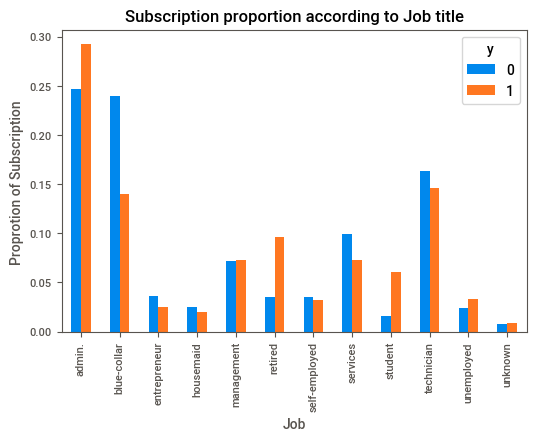

In [218]:
job_crosstab.drop(['Total'], axis=1).drop(['Total'], axis=0).plot(kind = 'bar')
plt.title('Subscription proportion according to Job title')
plt.xlabel('Job')
plt.ylabel('Proprotion of Subscription ')
plt.show()

The frequency of subscription of the deposit depends much on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [189]:
marital_crosstab = pd.crosstab(data['marital'], data['y'])
marital_crosstab

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


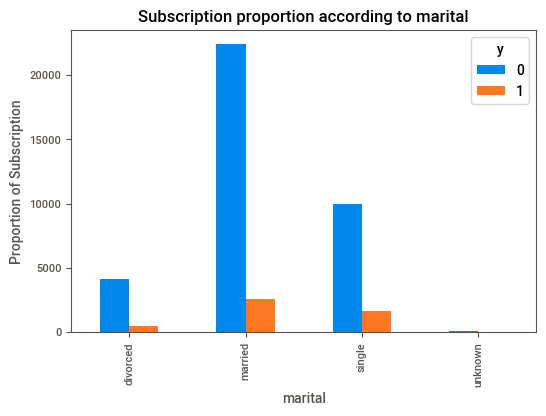

In [191]:
marital_crosstab.plot(kind = 'bar')
plt.xlabel('marital')
plt.ylabel('Proportion of Subscription')
plt.title('Subscription proportion according to marital')
plt.show()

Marial status of customers seems not to affect the frequency of purchase of the deposit. Therefore, marial feature is not a good predictor for the outcome variable.

In [198]:
education_crosstab = pd.crosstab(data['education'], data['y'])
education_crosstab_pct = education_crosstab.div(education_crosstab.sum(1), axis = 0)
education_crosstab_pct

y,0,1
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


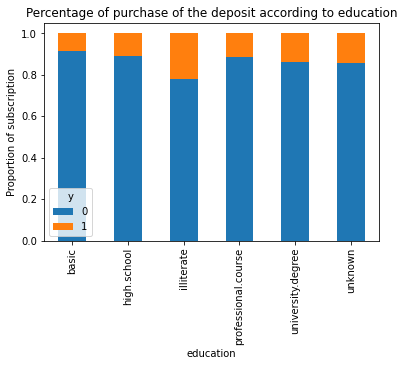

In [26]:
education_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('education')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to education')
plt.show()


Education feature is a good predictor for the frequency of deposit subscription

In [27]:
month_crosstab = pd.crosstab(data['month'], data['y'])
month_crosstab_pct = month_crosstab.div(month_crosstab.sum(1), axis = 0)
month_crosstab_pct

y,0,1
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


<AxesSubplot: xlabel='month'>

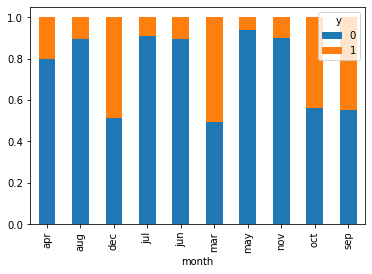

In [28]:
month_crosstab_pct.plot(kind = 'bar', stacked = True)

Month feature may be a good predictor for the outcome variable

In [29]:
day_of_week_crosstab = pd.crosstab(data['day_of_week'], data['y'])
day_of_week_crosstab_pct = day_of_week_crosstab.div(day_of_week_crosstab.sum(1), axis = 0)
day_of_week_crosstab_pct

y,0,1
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


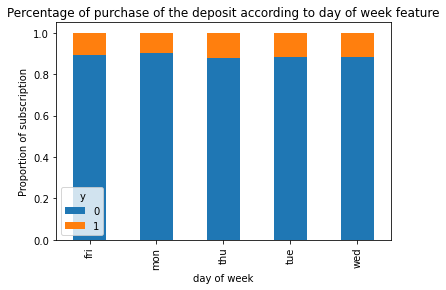

In [30]:
day_of_week_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('day of week')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to day of week feature')
plt.show()

Day of week feature doesn't seem to be a good predictor for the outcome variable

In [31]:
poutcome_crosstab = pd.crosstab(data['poutcome'], data['y'])
poutcome_crosstab_pct = poutcome_crosstab.div(poutcome_crosstab.sum(1), axis = 0)
poutcome_crosstab_pct

y,0,1
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


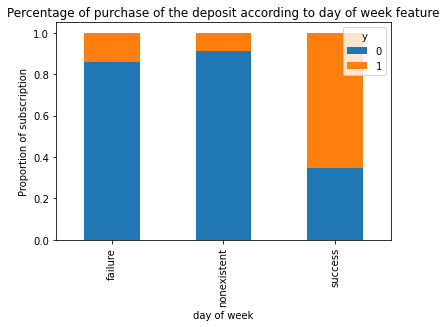

In [32]:
poutcome_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('day of week')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to day of week feature')
plt.show()

poutcome seems to be a good predictor of the outcome variable

In [219]:
# import sweetviz as sv


# my_report = sv.analyze(train_data)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [220]:
# my_report = sv.analyze(train_data, target_feat="y")
# my_report.show_html() #

In [221]:
# my_report = sv.compare_intra(train_data, train_data["y"] == 1, ["1", "0"])
# my_report.show_html() #

# Create dummy variables

In [33]:
object_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [34]:
for var in object_cols:
    
    just_dummies = pd.get_dummies(data[var], prefix = var)
    data1 = pd.concat([data, just_dummies], axis = 1)
    data = data1
data_f = pd.DataFrame(data)
data_f

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3,1,success,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,31,housemaid,married,basic,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,...,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [35]:
data.shape

(41188, 72)

In [36]:
list_colname = data.columns.tolist()
list_colname

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month

In [37]:
keep_col = [i for i in list_colname if i not in object_cols]
keep_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_

In [38]:
data_final = data[keep_col]
data_final

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


# Oversampling using SMOTE 

In [39]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# columns = X_train.columns
# os_data_X,os_data_y=os.fit_resample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
# print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [40]:
from imblearn.over_sampling import SMOTE
# Chia train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Upsmapling = SMOTE
os = SMOTE(random_state=0,k_neighbors = 5)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['y'])
print(os_data_X)
print(os_data_y)

       age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       31       259         1    999         1     -0.100000       93.200000   
1       44       300         1    999         0      1.100000       93.994000   
2       43       134         1    999         0      1.100000       93.994000   
3       35       169         2    999         0     -0.100000       93.200000   
4       33       255         2    999         1     -1.800000       92.893000   
...    ...       ...       ...    ...       ...           ...             ...   
51129   43       215         1    999         0     -3.400000       92.379000   
51130   79       157         2    999         0     -1.800000       92.844648   
51131   27       101         1      5         1     -2.086453       93.191757   
51132   36       716         4    999         0      1.400000       93.930743   
51133   69       142         1    999         0     -3.400000       92.431000   

       cons_conf_idx  eurib

In [41]:
# Check the number of our data
print("length of oversampled data is", len(os_data_X))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['y']==1]))
print("Number of subscription in oversampled data", len(os_data_y[os_data_y['y'] == 1]))
print("Proportion of no subscription data in oversampled data is", 
     len(os_data_y[os_data_y['y']==0])/len(os_data_y))
print("Proportion of subscription data in oversampled data is", 
     len(os_data_y[os_data_y['y']==1])/len(os_data_y))

length of oversampled data is 51134
Number of no subscription in oversampled data 25567
Number of subscription in oversampled data 25567
Proportion of no subscription data in oversampled data is 0.5
Proportion of subscription data in oversampled data is 0.5


# Recursive Feature Eimination

In [42]:
data_final_vars = data_final.columns.tolist()
y = ['y']
X = [i for i in data_final_vars if i not in y]

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[35 37 30 38 31 25 28 33 40 34  9  2  3  6  8 12  7  4 13  5 10 11 16 17
 18 36  1  1 41  1  1  1  1  1 42  1  1  1  1  1  1  1  1 23 19 39 21 24
 32 22 20 26 27  1  1  1  1  1 15 14 29]


In [45]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [46]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455646
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.343     
Dependent Variable:   y                 AIC:               46637.9774
Date:                 2023-01-02 19:07  BIC:               46814.8215
No. Observations:     51134             Log-Likelihood:    -23299.   
Df Model:             19                LL-Null:           -35443.   
Df Residuals:         51114             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1613   0.0082  19.7908 0.0000  0.1454  0.1773
job_blue-collar 

# Logistic Regression Model Fitting

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[7021  645]
 [1335 6340]]
